In [157]:
import pandas as pd
import numpy as np

data = pd.read_csv('data.txt')
data.insert(0, '1', 1)
data = data[data['class'] <= 2]

X = data.as_matrix(columns=['1', 'alcohol', 'alcalinity'])
y = data.as_matrix(columns=['class'])
for i in range(len(y)):
    y[i,0] = y[i,0] -1
    #print(y[i,0])
    #print(i)
#print(X)

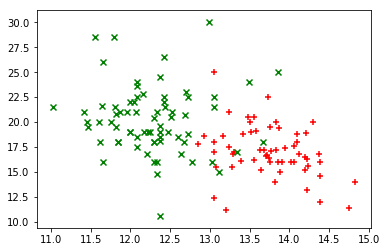

In [159]:
import matplotlib.pyplot as plt
%matplotlib inline

def y_filter(X, y, value):
    return np.matrix([X[i,:] for i in range(len(X)) if y[i,0] == value])

x0 = y_filter(X, y, 0)
x1 = y_filter(X, y, 1)
plt.scatter(x0[:,1], x0[:,2], marker='+', color='red')
plt.scatter(x1[:,1], x1[:,2], marker='x', color='green')

In [160]:
import numpy as np
from scipy.special import expit

def sigmoid(X):
    return 1 / (1 + np.exp(-X))

def predict(X, theta):
    return sigmoid(X * np.matrix(theta).T) >= 0.5

def cost(theta, X, y):
    theta = np.matrix(theta)
    
    h = expit(np.matmul(X, theta.T))
    y1 = np.multiply(-y, np.log(h))
    y0 = np.multiply((1 - y), np.log(1 - h))
    j = np.sum(y1 - y0) / (len(X))
    return j

def gradient(theta, X, y):
    error = sigmoid(X * np.matrix(theta).T) - y
    grad = (1/len(X)) * np.matmul(X.T, error)
    #print(error)
    
    return grad

def gradient2(theta, X, y):  
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)

    error = sigmoid(X * theta.T) - y

    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)

    return grad

def descent(theta, X, y, iterations):
    for i in range(iterations):
        theta = theta = gradient(theta, X, y)

In [161]:
import scipy.optimize as opt  

theta = np.zeros(3)
#descent(theta, X, y, 100)
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient2, args=(X, y))
theta = result[0]
print(result)

print(theta)
print(cost(theta, X, y))

(array([ 59.54988136,  -4.96096201,   0.28874618]), 86, 1)
[ 59.54988136  -4.96096201   0.28874618]
0.177418331666


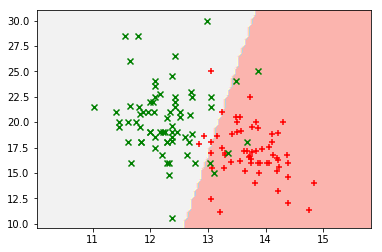

In [162]:
from matplotlib import cm

def boundary(X, theta):
    
    x_min, x_max = X[:,1].min() - 1, X[:,1].max() + 1
    y_min, y_max = X[:,2].min() - 1, X[:,2].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(-10, y_max, 100)
    )

    inputs = np.c_[np.ones(10000), xx.ravel(), yy.ravel()]
    predictions = predict(inputs, theta).reshape(xx.shape)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)  
    plt.contourf(xx, yy, predictions, cmap=cm.Pastel1)
    
boundary(X, theta)

x0 = y_filter(X, y, 0)
x1 = y_filter(X, y, 1)
plt.scatter(x0[:,1], x0[:,2], marker='+', color='red')
plt.scatter(x1[:,1], x1[:,2], marker='x', color='green')